In [6]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input/colonpolyp/ihc_data.xlsx'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [8]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

file_path = "/kaggle/input/colonpolyp/ihcData.xlsx"
df = pd.read_excel(file_path)
# Find the number of unique patients
unique_patients = df['patient'].nunique()

# Find the unique combinations of patients and polyps
unique_patient_polyp_combinations = df.groupby(['patient', 'polyp']).size().reset_index().rename(columns={0: 'count'})

# Print the results
print("Number of Unique Patients:", unique_patients)
print("Number of Unique Polyps:", df['polyp'].count().sum())

Number of Unique Patients: 201
Number of Unique Polyps: 399


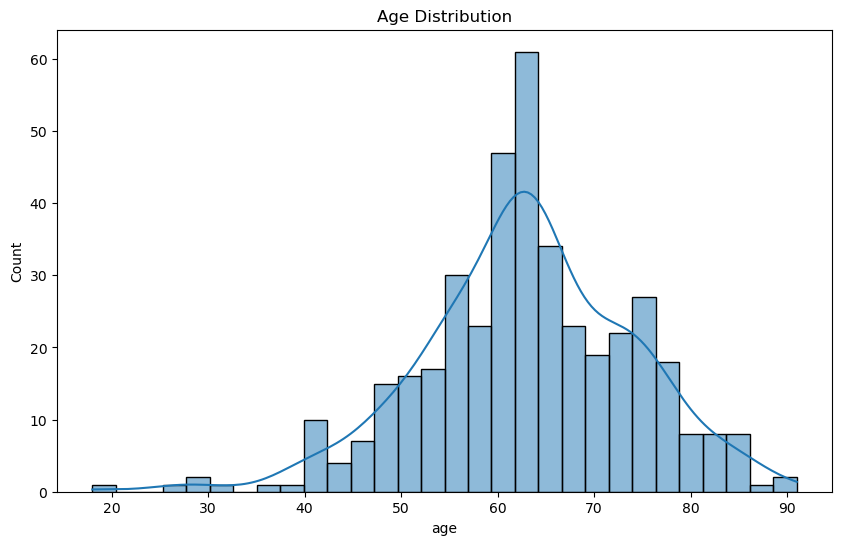

Age Range:  62.98 +/- 10.98


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Age Distribution
plt.figure(figsize=(10,6))
sns.histplot(data=df, x='age', bins=30, kde=True)
plt.title('Age Distribution')
plt.show()

mean_age = df['age'].mean()
std_age = df['age'].std()

age_range = f"{mean_age:.2f} +/- {std_age:.2f}"

print("Age Range: ", age_range)

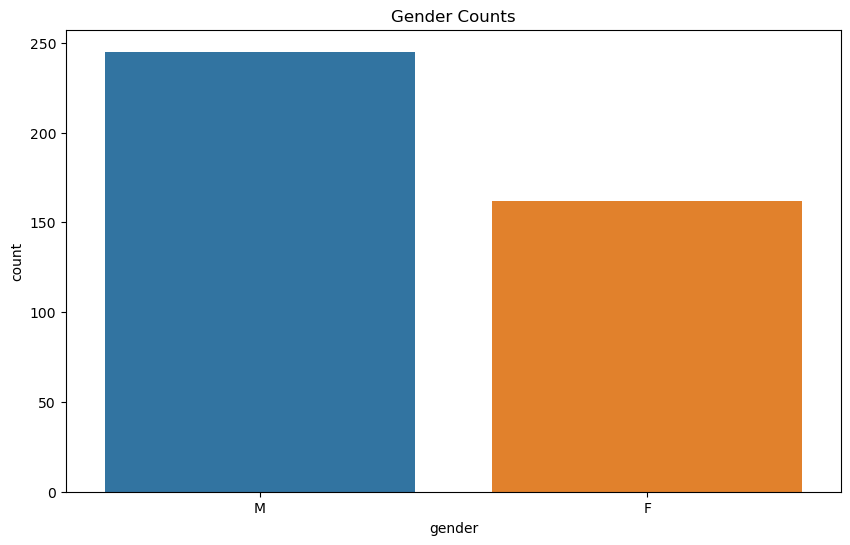

Male Count: 245
Female Count: 162


In [10]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='gender')
plt.title('Gender Counts')
plt.show()


male_count = df[df['gender'] == 'M'].shape[0]
female_count = df[df['gender'] == 'F'].shape[0]
print("Male Count:", male_count)
print("Female Count:", female_count)

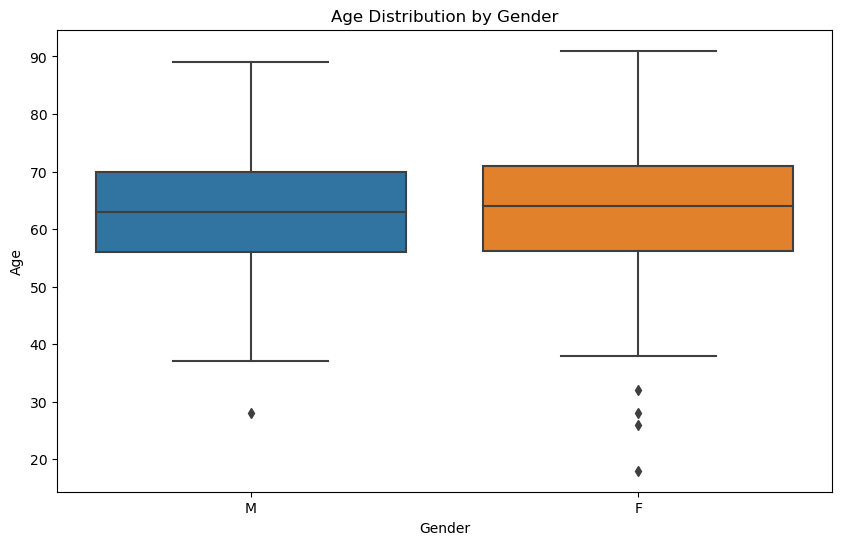

In [11]:
# Box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='gender', y='age', data=df)
plt.title('Age Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Age')
plt.show()


In [12]:
df.loc[(df['type'] == 'nonneoplastic') & (df['subtype'] == 'carcinom'), 'type'] = 'carcinom'

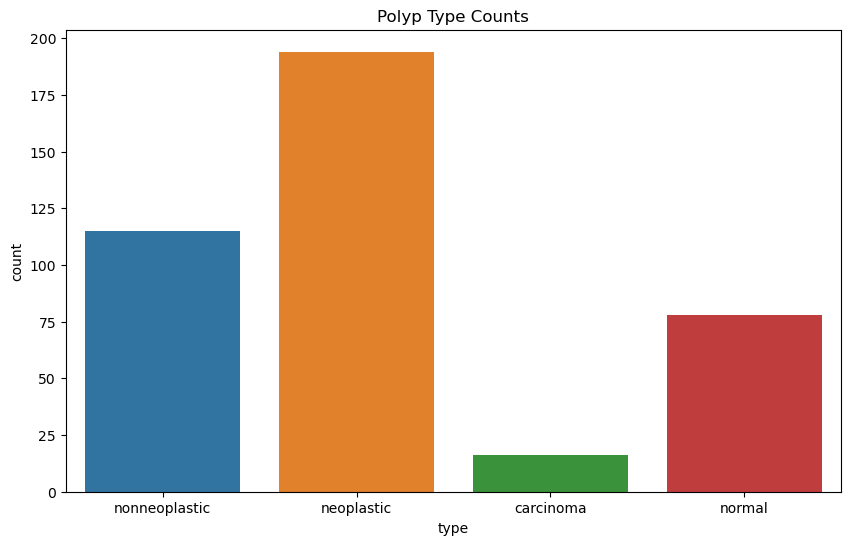

neoplastic       194
nonneoplastic    115
normal            78
carcinoma         16
Name: type, dtype: int64


In [17]:
df.loc[df['type'] == 'carcinom', 'type'] = 'carcinoma'

# Bar plot showing the count of polyp types
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='type')
plt.title('Polyp Type Counts')
output_path = '/kaggle/working/polyp_type_countsColon.png' 
plt.savefig(output_path, bbox_inches='tight', dpi=300) # bbox_inches='tight' kenar boşluklarını ayarlar, dpi çözünürlüğü artırır.

plt.show()

# Calculate the counts of polyp types
polyp_type_counts = df['type'].value_counts()

# Print the results
print(polyp_type_counts)

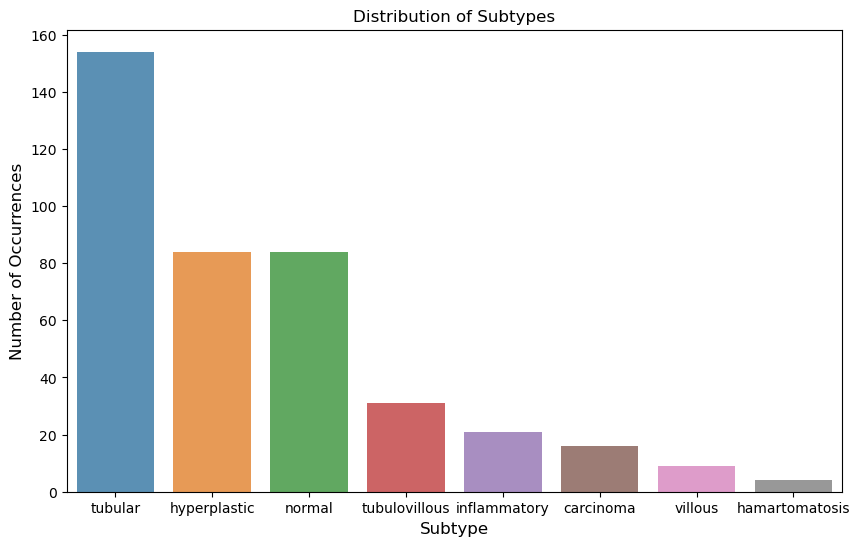

          subtype  count
0       carcinoma     16
1  hamartomatosis      4
2    hyperplastic     84
3    inflammatory     21
4          normal     84
5         tubular    154
6   tubulovillous     31
7         villous      9


In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
df.loc[df['subtype'] == 'inflamatuar', 'subtype'] = 'inflammatory'
df.loc[df['subtype'] == 'serrated', 'subtype'] = 'hyperplastic'

# Get the distribution of values in the 'subtype' column
subtype_distribution = df['subtype'].value_counts()

# Get the names and counts of the subtypes as separate lists
subtypes = subtype_distribution.index.tolist()
counts = subtype_distribution.values.tolist()

# Create a bar plot
plt.figure(figsize=(10,6))
sns.barplot(x=subtypes, y=counts, alpha=0.8)

plt.title('Distribution of Subtypes')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Subtype', fontsize=12)
output_path = '/kaggle/working/polyp_subtype_countsColon.png' 
plt.savefig(output_path, bbox_inches='tight', dpi=300) # bbox_inches='tight' kenar boşluklarını ayarlar, dpi çözünürlüğü artırır.

plt.show()


import pandas as pd

# Perform grouping to count polyp subtypes
polyp_subtype_counts = df.groupby('subtype').size().reset_index(name='count')

# Print the results using DataFrame
print(polyp_subtype_counts)

neoplastic       194
nonneoplastic    116
normal            78
carcinom          16


          subtype  count
0        carcinom     16 - carcinom 
1  hamartomatosis      4 - nonneoplastic
2    hyperplastic     82 - nonneoplastic
3     inflamatuar     21 - nonneoplastic
4          normal     84 - normal
5        serrated      2 - nonneoplastic
6         tubular    154 - neoplastic
7   tubulovillous     31 - neoplastic
8         villous      9 - neoplastic